In [ ]:
#imoprt packages
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giamm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1]:
# pip install nlpaug
from nlpaug.util.file.download import DownloadUtil
import nlpaug.augmenter.word as naw
from sklearn import svm

In [2]:

training = pd.read_csv("https://raw.githubusercontent.com/GiammarcoBozzelli/DSML/main/DATA/training_data.csv")
test = pd.read_csv("https://raw.githubusercontent.com/GiammarcoBozzelli/DSML/main/DATA/unlabelled_test_data.csv")

def preprocess_text(text):
    # Remove punctuation, digits, etc.
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Lowercase
    text = text.lower()
    # Tokenization and remove stop words
    tokens = text.split()
    stop_words = set(stopwords.words('french'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = SnowballStemmer('french')
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

augmenter = naw.BackTranslationAug()
augmented_sentences = augmenter.augment(training['sentence'])

# Combine original and augmented data
augmented_training = pd.DataFrame({'sentence': augmented_sentences, 'difficulty': training['difficulty']})
training = pd.concat([training, augmented_training], ignore_index=True)

# Preprocess text
training['processed_sentence'] = training['sentence'].apply(preprocess_text)

# Vectorize training data
vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(training['processed_sentence'])
y_train = training['difficulty']

svm_model = svm.SVR(kernel = 'linear', random_state = 42)
svm_model.fit(X_train, y_train)

# Make predictions with SVM model


#------------------------------------------------------------------------------------------------
#Prediction Preparation 
test['processed_sentence'] = test['sentence'].apply(preprocess_text)

# Vectorize the test data
X_test = vectorizer.transform(test['processed_sentence'])

# Make predictions
predicted_difficulties = svm_model.predict(X_test)

# Create a submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],
    'difficulty': predicted_difficulties
})

# Export to CSV
#submission.to_csv(directory+'Outputs/prediction1_DT.csv', index=False)


NameError: name 'pd' is not defined

In [ ]:
training.head()

,id,sentence,difficulty,processed_sentence
0,0,Les coûts kilométriques réels peuvent diverger...,C1,coût kilometr réel peuvent diverg sensibl vale...
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1,bleu cest couleur préfer naim vert
2,2,Le test de niveau en français est sur le site ...,A1,test niveau franc sit internet lécol
3,3,Est-ce que ton mari est aussi de Boston?,A1,estce mar auss boston
4,4,"Dans les écoles de commerce, dans les couloirs...",B1,écol commerc couloir plac financi arriv aujour...


id                    0
sentence              0
difficulty            0
processed_sentence    0
dtype: int64


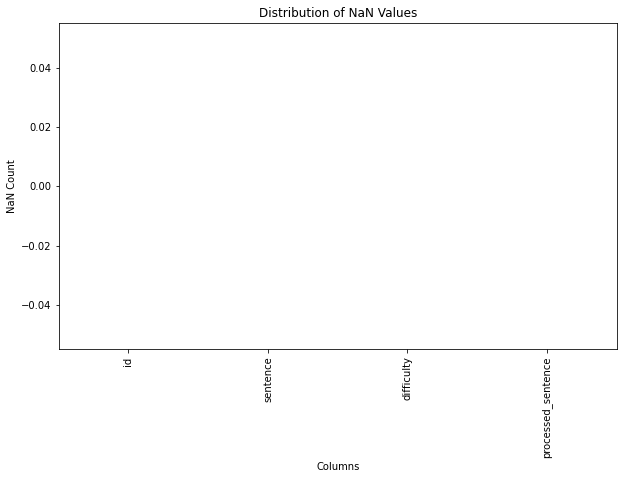

In [ ]:

nan_counts = training.isna().sum()
print(nan_counts)


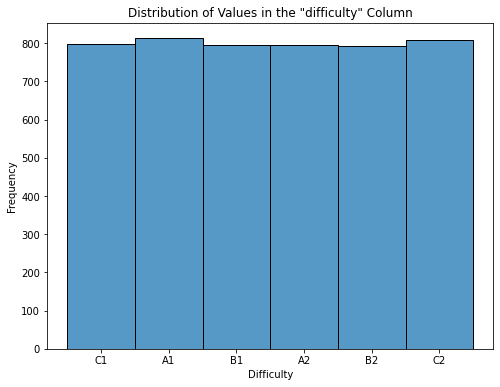

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(training['difficulty'])
plt.title('Distribution of Values in the "difficulty" Column')
plt.xlabel('Difficulty')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# class CFG:
#     model_name="distilroberta-base"
#     model_path=f"/kaggle/input/roberta-transformers-pytorch/{model_name}"
#     learning_rate = 5e-5
#     weight_decay = 0.02
#     hidden_dropout_prob=0.001
#     attention_probs_dropout_prob=0.001
#     num_train_epochs=5
#     n_splits=4
#     batch_size=32
#     warmup_steps=200
#     max_length=512